### Pandas

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")

In [4]:
df.head(3)

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan


How many different companies are represented in the data set?

In [5]:
df["Company Name"].nunique()

439

What is the total number of jobs created for businesses in Queens?


In [6]:
df['Job created'].sum()

149.0

How many different unique email domains names are there in the data set?

In [7]:
df['company email'].str.split("@").str[1].nunique()

356

Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

In [8]:
df_nta = df[['NTA', 'Company Name']].groupby('NTA').nunique()
df_nta = df_nta[df_nta['Company Name'].values > 5]

df3 = pd.merge(df, df_nta, on=['NTA', 'NTA'])
print(f"Total savings: {df3['Total Savings'].mean()}")
print(f"Total jobs created: {df3['Job created'].sum()}")
df_nta_totalsavings = df3.groupby('NTA')['Total Savings'].mean()
df_nta_jobscreated = df3.groupby('NTA')['Job created'].mean()

Total savings: 36655.65520270271
Total jobs created: 79.0


Save your result for the previous question as a CSV file.

In [9]:
df_nta_totalsavings.to_csv('nta_totalsavings.csv')
df_nta_jobscreated.to_csv('nta_jobscreated.csv')

### Matplotlib

In [10]:
df = pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")

In [11]:
df.head(3)

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan


In [12]:
df.sum()

/tmp/ipykernel_23232/1703867807.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum()


Company Name                                 1 State Street100 Church LLC100 Wall Investmen...
company contact                              David NeiburgEdward A. CarrollJerry BranamAndr...
company phone                                7186779077212566300021224871603474178429212406...
Address                                      1114 Avenue J100 Church Street96 Wall Street22...
City                                         BrooklynNYNew YorkBrooklynNew YorkNew YorkLong...
State                                        NYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNY...
Postcode                                                                               4960856
Industry                                     CommercialCommercialLandlordLandlordCommercial...
Company Type                                 LMEPLMEPLMEPECSPLMEPLMEPECSPECSPECSPECSPLMEPLM...
Current fulltime                                                                       55387.0
Job created                                       

scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

In [13]:
print(df.shape)
df[df.duplicated('Company Name')]

(450, 26)


,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
34,Albert Einstein College of Medicine R&D,Jack Zencheck,mwinkle1@yu.edu,7184308977,1196 Pierce Avenue,Bronx,NY,10461,Other,Research facility,...,5779327.33,Bronx,40.848176,-73.846583,211.0,13.0,286.0,2044325.0,2.040900e+09,Van Nest-Morris Park-Westchester Square
162,FEDERAL EXPRESS,Samuel Adamson,sam.adamson@fedex.com,7187886000,830 Fountain Avenue,Brooklyn,NY,11239,Commercial,OVERNIGHT SHP.,...,378098.57,Brooklyn,40.659816,-73.866717,305.0,42.0,1070.0,3346449.0,3.044520e+09,East New York
163,FEDERAL EXPRESS,Samuel Adamson,sam.adamson@fedex.com,7187886000,830 Fountain Avenue,Brooklyn,NY,11239,Commercial,OVERNIGHT SHP.,...,467120.83,Brooklyn,40.659816,-73.866717,305.0,42.0,1070.0,3346449.0,3.044520e+09,East New York
173,FRESH DIRECT LLC,JOE LACY,gbennett@freshdirect.com,2128222203,23-30 BORDEN AVENUE,Queens,NY,11101,Manufacturing,MFG. PERIS. FOOD,...,1989179.05,Queens,40.739918,-73.947213,402.0,26.0,1.0,4436621.0,4.000680e+09,Hunters Point-Sunnyside-West Maspeth
227,"JetBlue Airways, Corp.",Dave Barger,Dave.Barger.@Jetblue.com,718-286-79,27-01 Bridge Plaza North,Long Island City,NY,11101,Other,Back Office,...,592457.59,Queens,40.750561,-73.939315,401.0,26.0,33.0,4005016.0,4.004160e+09,Queensbridge-Ravenswood-Long Island City
242,"KEPCO, INC.",MARTIN KUPFERBERG,NaN,7184617000,131-10 & 131-40 MAPLE AVENUE,Queens,NY,11352,Manufacturing,MFG. ELECTRONIC EQUIPMENT,...,283913.77,Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,"Magellan Aerospace New York, Inc",Gregory Schmidt,gregory.schmidt@magellan.aero,7186994000,97-11 50th Ave,Queens,NY,11368,Manufacturing,"Mfg aerospace landing gear, assemblies and parts",...,684838.68,Queens,40.742133,-73.865661,404.0,21.0,411.0,4440227.0,4.018800e+09,Corona
279,MEDITERRANEAN GYRO PRODUCTS,Sophie Maroulis,smaroulis@corfufoods.com,7187863399,11-14 38TH STREET,Queens,NY,11101,Manufacturing,mfg pita bread/whsl Greek specialty foods,...,88403.53,Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,Montefiore Medical Center,Jeffrey Hogan,pjenning@montefiore.org,7189202451,111 EAST 210TH STREET,BRONX,NY,10467,Commercial,Research Facility,...,7876903.11,Bronx,40.879885,-73.880481,207.0,11.0,421.0,2096399.0,2.033270e+09,Norwood
366,SILVERCUP Services LLC,GARY KESNER,gkesner@silvercupstudios.com,7189062300,42-22 22nd Street,Long Island City,NY,11101,Manufacturing,MFG- MOVIE AND TV PROD,...,1335829.73,Queens,40.751055,-73.943635,402.0,26.0,19.0,4005076.0,4.004270e+09,Hunters Point-Sunnyside-West Maspeth


In [14]:
df_total_savings = pd.read_csv('nta_totalsavings.csv')
df_jobs_created = pd.read_csv('nta_jobscreated.csv')

In [15]:
# Merge

df_savings_jobs = pd.merge(df_total_savings, df_jobs_created, how='outer')
df_savings_jobs.head(5)

,NTA,Total Savings,Job created
0,Battery Park City-Lower Manhattan,469890.796667,NaN
1,Bushwick South,26140.455000,10.0
2,Carroll Gardens-Columbia Street-Red Hook,24337.390000,NaN
3,College Point,17159.372857,2.0
4,Crown Heights North,4036.298889,NaN


scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

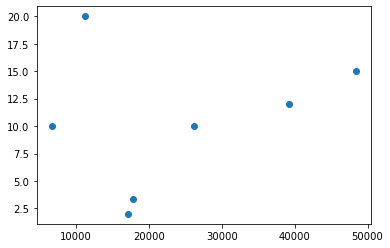

In [16]:
import matplotlib.pyplot as plt

plt.scatter(data=df_savings_jobs, y='Job created', x='Total Savings')

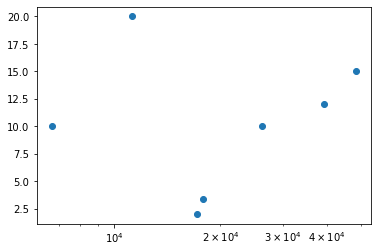

In [17]:
plt.scatter(data=df_savings_jobs, y='Job created', x='Total Savings')
plt.xscale('log')

histogram of the log of the average total savings.


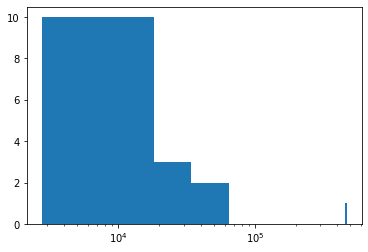

In [18]:
plt.hist(data=df_savings_jobs, x="Total Savings", bins=30)
plt.xscale('log')

line plot of the total jobs created for each month.

([<matplotlib.axis.XTick at 0x7fa4548a68c0>,
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

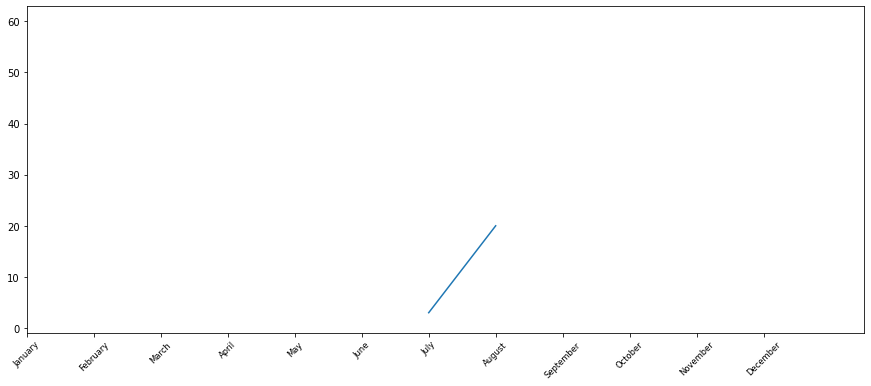

In [19]:
# Convert the date to a datetime format
df['Effective Date'] = pd.to_datetime(df['Effective Date'], format='%m/%d/%Y')
x=df['Effective Date'].dt.month
y=df['Job created']

month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.subplots(figsize=(15, 6))
plt.plot(x, y)
plt.xticks(range(len(month_names)), month_names, size='small', rotation=45)